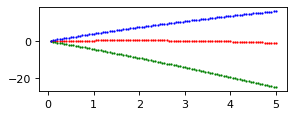

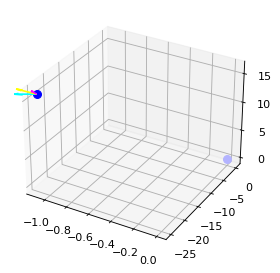

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython import display

# Function to get acceleration of the mass, based off of the Lorentz Force formula. The variable 'a' refers to the 
# acceleration of the mass.
def acc(q, v, B, E, m):
    F = q*(E + np.cross(v,B));
    a = F/m;
    
    return a;

def main():
    
    # defining necessary variables for the simulation. 
    t = 0;
    tf = 5;
    dt = 0.05;
    N = int(np.ceil(tf/dt));
    plotRealTime = True;
    
    # defining the physical variables.
    r = [0,0,0];
    ri = r;
    vl = np.random.randn(1,3) * random.randint(1,5);
    B = np.random.randn(1,3) * random.randint(1,10);
    E = np.random.randn(1,3) * random.randint(1,10);
    m = 10;
    q = 1;
    
    a = acc(q, vl, B, E, m);
    
    # creating the plots and turning interactive plotting on to animate our results.  
    plt.ion();
    fig = plt.figure(figsize=(4,5), dpi=80);
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3);
    ax1 = plt.axes(projection='3d')
    
    fig2 = plt.figure(figsize=(4,5), dpi=80);
    ax2 = plt.subplot(grid[2,0]);
    
    for i in range(N):
        
        # updating position based on the acceleration function created above and using the leapfrog integration technique. 
    
        r += vl*dt + 0.5*a*dt**2;
        vl += a*dt/2.0;
        
        a = acc(q, vl, B, E, m);
        vl += a*dt/2.0;
        t += dt;
        
        if plotRealTime or (i == N-1):
            
            # graph the second plot with the position 'x', 'y', 'z' with respect to time.
            plt.sca(ax2);
            plt.scatter(t,r[0][0],color='red',s=1);
            plt.scatter(t,r[0][1],color='green',s=1);
            plt.scatter(t,r[0][2],color='blue',s=1);
            
            # clear graphs for every iteration and plot the positions of cart and pendulum (with the spring and string drawn)
            # the position is plotted as 'z' vs 'y' vs 'x'.
            plt.sca(ax1);
            plt.cla();
            
            ax1.scatter(ri[0],ri[1],ri[2],s=50,color=[0.7,0.7,1]);
            ax1.scatter(r[0][0],r[0][1],r[0][2],s=50,color='blue');
            
            ax1.quiver(r[0][0],r[0][1],r[0][2], B[0][0],B[0][1],B[0][2], length = 1, normalize = True, color = 'magenta')
            ax1.quiver(r[0][0],r[0][1],r[0][2], E[0][0],E[0][1],E[0][2], length = 1, normalize = True, color = 'cyan')
            ax1.quiver(r[0][0],r[0][1],r[0][2], vl[0][0],vl[0][1],vl[0][2], length = 1, normalize = True, color = 'yellow')
            
            # the part of the code that animates results rather than plotting a graph for each iteration of the 'for' loop.
            display.display(plt.gcf());
            display.clear_output(wait=True);
            
            fig2.canvas.draw();
            fig2.canvas.flush_events();
            
            fig.canvas.draw();
            fig.canvas.flush_events();
            
    return 0;

if __name__== "__main__":
    main()